# Linear, ridge, and lasso regression example

## `01` Import  libraries

In [452]:
# Essential Libraries
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [453]:
# Sklearn 

from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV

from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error

## `02` EDA

### Load the data

In [454]:
data = pd.read_csv('Hitters.csv')
df_hitters = data.copy()
df_hitters.head(10)


,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A
6,185,37,1,23,8,21,2,214,42,1,30,9,24,N,E,76,127,7,70.0,A
7,298,73,0,24,24,7,3,509,108,0,41,37,12,A,W,121,283,9,100.0,A
8,323,81,6,26,32,8,2,341,86,6,32,34,8,N,W,143,290,19,75.0,N
9,401,92,17,49,66,65,13,5206,1332,253,784,890,866,A,E,0,0,0,1100.0,A


In [455]:
df_hitters.info()

# insight we can get from the data
# we have 3 categorical columns , 1 float and 16 integer columns
# we have 322 rows and 20 columns
# there is a one column with missing values (Salary)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      322 non-null    int64  
 1   Hits       322 non-null    int64  
 2   HmRun      322 non-null    int64  
 3   Runs       322 non-null    int64  
 4   RBI        322 non-null    int64  
 5   Walks      322 non-null    int64  
 6   Years      322 non-null    int64  
 7   CAtBat     322 non-null    int64  
 8   CHits      322 non-null    int64  
 9   CHmRun     322 non-null    int64  
 10  CRuns      322 non-null    int64  
 11  CRBI       322 non-null    int64  
 12  CWalks     322 non-null    int64  
 13  League     322 non-null    object 
 14  Division   322 non-null    object 
 15  PutOuts    322 non-null    int64  
 16  Assists    322 non-null    int64  
 17  Errors     322 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  322 non-null    object 
dtypes: float64

In [456]:
df_hitters.describe().T

,count,mean,std,min,25%,50%,75%,max
AtBat,322.0,380.928571,153.404981,16.0,255.25,379.5,512.00,687.0
Hits,322.0,101.024845,46.454741,1.0,64.00,96.0,137.00,238.0
HmRun,322.0,10.770186,8.709037,0.0,4.00,8.0,16.00,40.0
Runs,322.0,50.909938,26.024095,0.0,30.25,48.0,69.00,130.0
RBI,322.0,48.027950,26.166895,0.0,28.00,44.0,64.75,121.0
Walks,322.0,38.742236,21.639327,0.0,22.00,35.0,53.00,105.0
Years,322.0,7.444099,4.926087,1.0,4.00,6.0,11.00,24.0
CAtBat,322.0,2648.683230,2324.205870,19.0,816.75,1928.0,3924.25,14053.0
CHits,322.0,717.571429,654.472627,4.0,209.00,508.0,1059.25,4256.0
CHmRun,322.0,69.490683,86.266061,0.0,14.00,37.5,90.00,548.0


In [457]:
df_hitters.isnull().sum()/df_hitters.shape[0]*100 

# insight we can get 
# 18% of the salary column is missing

AtBat         0.000000
Hits          0.000000
HmRun         0.000000
Runs          0.000000
RBI           0.000000
Walks         0.000000
Years         0.000000
CAtBat        0.000000
CHits         0.000000
CHmRun        0.000000
CRuns         0.000000
CRBI          0.000000
CWalks        0.000000
League        0.000000
Division      0.000000
PutOuts       0.000000
Assists       0.000000
Errors        0.000000
Salary       18.322981
NewLeague     0.000000
dtype: float64

In [458]:
df_hitters.duplicated().sum()

np.int64(0)

In [459]:
# Categorical variables unique values
print('The league types are:', df_hitters['League'].unique())
print('The divison types are:', df_hitters['Division'].unique())
print('The new league options are:', df_hitters['NewLeague'].unique())

The league types are: ['A' 'N']
The divison types are: ['E' 'W']
The new league options are: ['A' 'N']


In [460]:
# correlation = df_hitters.corr()
# correlation['Salary'].sort_values(ascending=True)

## `03` Visualizing Data

In [461]:
# sns.pairplot(df_hitters)

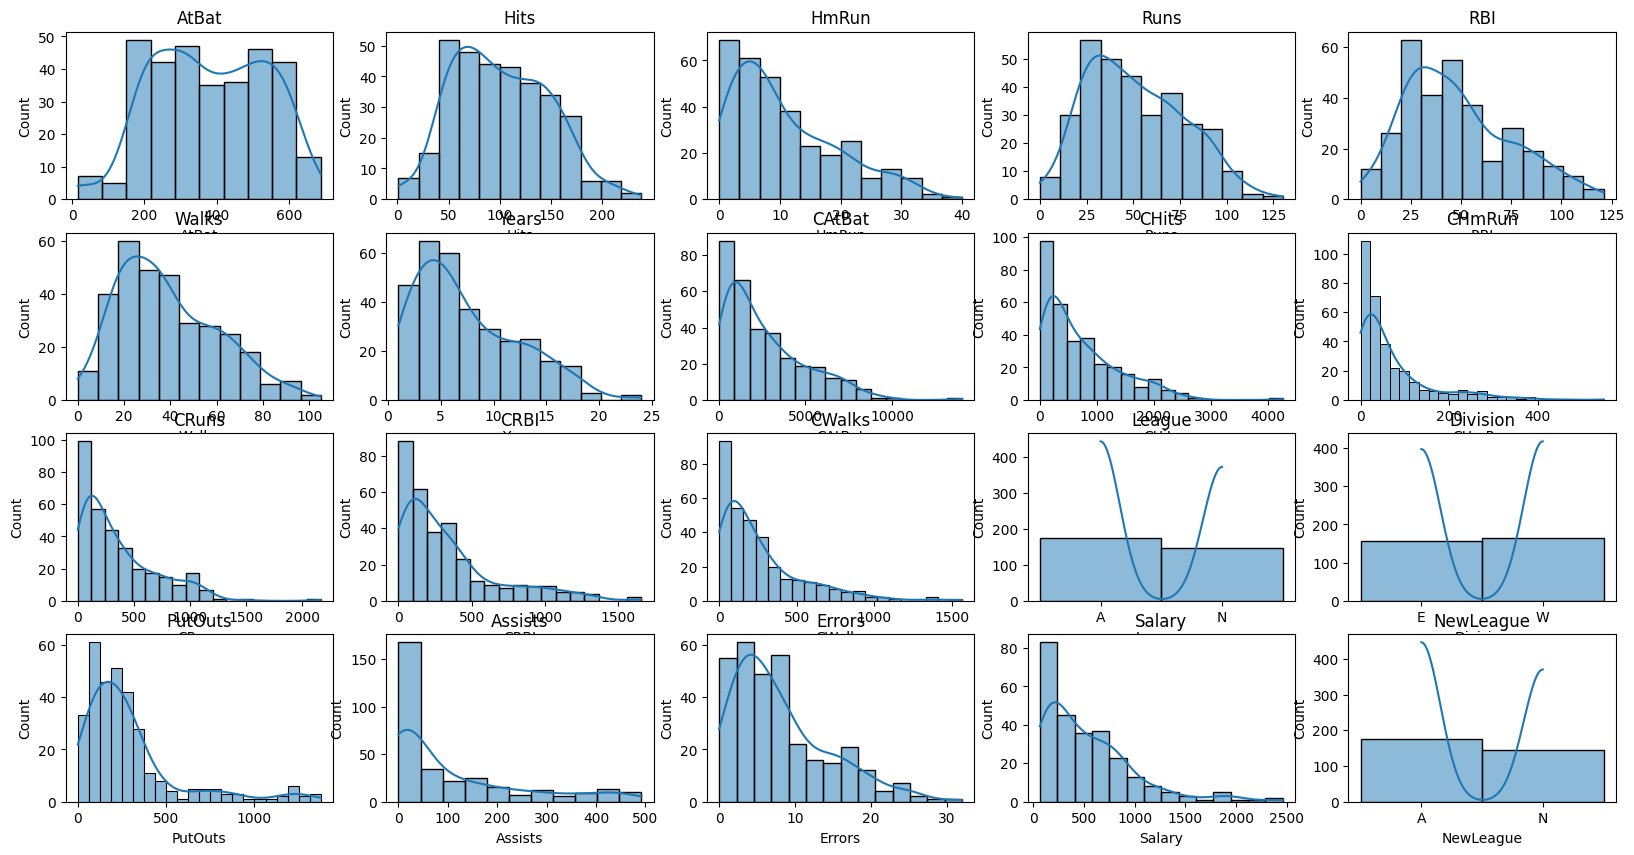

In [462]:
# I want to print the distribution of each column to look for outliers in one figure displots
plt.figure(figsize=(20, 10))
for i, column in enumerate(df_hitters.columns):
    plt.subplot(4, 5, i+1)
    sns.histplot(df_hitters[column], kde=True)
    plt.title(column)

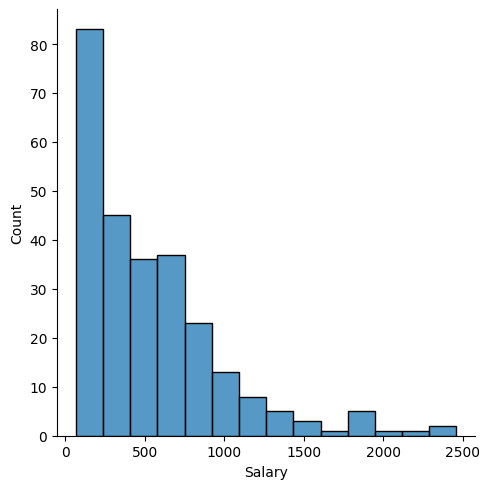

In [463]:
# Check distribution
sns.displot(df_hitters['Salary']);

## `04` Preprosessing 

In [464]:
# # fill the missing values with the mean using the imputer 
# imputer = SimpleImputer(strategy='median')
# df_hitters['Salary'] = imputer.fit_transform(df_hitters[['Salary']])    

# The median gave the highest score so I will use it to fill the missing values 
# But I  will try to use KNN imputer to see if it will give me a better score

In [465]:
# from sklearn.impute import KNNImputer

# KNN = KNNImputer()
# df_hitters['Salary'] = KNN.fit_transform(df_hitters[['Salary']])

# df_hitters.isnull().sum()

# Gave same result as the median 

In [466]:
df_hitters_nulls = df_hitters[df_hitters['Salary'].isnull()]
df_hitters = df_hitters.dropna()

df_hitters.isnull().sum()

AtBat        0
Hits         0
HmRun        0
Runs         0
RBI          0
Walks        0
Years        0
CAtBat       0
CHits        0
CHmRun       0
CRuns        0
CRBI         0
CWalks       0
League       0
Division     0
PutOuts      0
Assists      0
Errors       0
Salary       0
NewLeague    0
dtype: int64

In [467]:
df_hitters.info()

<class 'pandas.core.frame.DataFrame'>
Index: 263 entries, 1 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      263 non-null    int64  
 1   Hits       263 non-null    int64  
 2   HmRun      263 non-null    int64  
 3   Runs       263 non-null    int64  
 4   RBI        263 non-null    int64  
 5   Walks      263 non-null    int64  
 6   Years      263 non-null    int64  
 7   CAtBat     263 non-null    int64  
 8   CHits      263 non-null    int64  
 9   CHmRun     263 non-null    int64  
 10  CRuns      263 non-null    int64  
 11  CRBI       263 non-null    int64  
 12  CWalks     263 non-null    int64  
 13  League     263 non-null    object 
 14  Division   263 non-null    object 
 15  PutOuts    263 non-null    int64  
 16  Assists    263 non-null    int64  
 17  Errors     263 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  263 non-null    object 
dtypes: float64(1), 

In [468]:
df_hitters.shape

(263, 20)

In [469]:
# One Hot Encoding
OneHotEncoder_ = OneHotEncoder(drop='first')

In [470]:
df_hitters_encoded = OneHotEncoder_.fit_transform(df_hitters[['League', 'Division', 'NewLeague']])

In [471]:
df_hitters_encoded

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 380 stored elements and shape (263, 3)>

In [472]:
df_hitters_encoded = pd.DataFrame(df_hitters_encoded.toarray(), columns=['League_N', 'Division_W', 'NewLeague_N'])

In [473]:
df_hitters_encoded.shape

(263, 3)

In [474]:
df_hitters.shape

(263, 20)

In [475]:
df_hitters.isnull().sum(), df_hitters.shape

(AtBat        0
 Hits         0
 HmRun        0
 Runs         0
 RBI          0
 Walks        0
 Years        0
 CAtBat       0
 CHits        0
 CHmRun       0
 CRuns        0
 CRBI         0
 CWalks       0
 League       0
 Division     0
 PutOuts      0
 Assists      0
 Errors       0
 Salary       0
 NewLeague    0
 dtype: int64,
 (263, 20))

In [476]:
df_hitters_encoded.isnull().sum(), df_hitters_encoded.shape

(League_N       0
 Division_W     0
 NewLeague_N    0
 dtype: int64,
 (263, 3))

In [477]:
df_hitters = df_hitters.reset_index(drop=True)
df_hitters_encoded = df_hitters_encoded.reset_index(drop=True)

In [478]:
df_hitters = pd.concat([df_hitters, df_hitters_encoded], axis=1)
df_hitters.isnull().sum()

AtBat          0
Hits           0
HmRun          0
Runs           0
RBI            0
Walks          0
Years          0
CAtBat         0
CHits          0
CHmRun         0
CRuns          0
CRBI           0
CWalks         0
League         0
Division       0
PutOuts        0
Assists        0
Errors         0
Salary         0
NewLeague      0
League_N       0
Division_W     0
NewLeague_N    0
dtype: int64

In [479]:
df_hitters.isnull().sum()

AtBat          0
Hits           0
HmRun          0
Runs           0
RBI            0
Walks          0
Years          0
CAtBat         0
CHits          0
CHmRun         0
CRuns          0
CRBI           0
CWalks         0
League         0
Division       0
PutOuts        0
Assists        0
Errors         0
Salary         0
NewLeague      0
League_N       0
Division_W     0
NewLeague_N    0
dtype: int64

In [480]:
df_hitters.drop(['League', 'Division', 'NewLeague'], axis=1, inplace=True)
df_hitters.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,League_N,Division_W,NewLeague_N
0,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.0,1.0,1.0,1.0
1,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.0,0.0,1.0,0.0
2,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.0,1.0,0.0,1.0
3,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.5,1.0,0.0,1.0
4,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25,750.0,0.0,1.0,0.0


In [481]:
# Robust Scaler
scaler = RobustScaler()

In [482]:
df_hitters_scaled = scaler.fit_transform(df_hitters)
type(df_hitters_scaled)

numpy.ndarray

In [483]:
df_hitters_scaled = pd.DataFrame(df_hitters_scaled, columns=df_hitters.columns)
df_hitters_scaled.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,League_N,Division_W,NewLeague_N
0,-0.402464,-0.314286,-0.153846,-0.708861,-0.219512,0.058824,1.333333,0.498031,0.378860,0.374194,0.181122,0.558422,0.780583,1.952153,-0.010870,0.3,0.089286,1.0,0.0,1.0
1,0.271047,0.385714,0.692308,0.354430,0.609756,1.147059,-0.500000,-0.100722,-0.070071,0.296774,-0.066327,0.109256,0.345631,3.138756,0.201087,0.7,0.098214,0.0,0.0,0.0
2,0.340862,0.542857,0.846154,0.329114,0.756098,0.000000,0.833333,1.212927,1.257720,2.387097,1.474490,1.845220,0.699029,-0.114833,-0.184783,-0.4,0.133929,1.0,-1.0,1.0
3,-0.377823,-0.228571,0.076923,-0.329114,-0.121951,-0.205882,-0.666667,-0.503609,-0.492874,-0.361290,-0.515306,-0.558422,-0.547573,2.779904,-0.027174,-0.3,-0.595536,1.0,-1.0,1.0
4,0.743326,0.942857,-0.384615,0.556962,0.097561,-0.058824,0.833333,0.812664,0.732779,-0.270968,0.640306,0.321700,0.077670,0.277512,2.043478,1.8,0.580357,0.0,0.0,0.0


In [484]:
df_hitters_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
AtBat,263.0,-0.038429,0.604958,-1.618070,-0.535934,0.0,0.464066,1.125257
Hits,263.0,0.068984,0.644648,-1.457143,-0.450000,0.0,0.550000,1.928571
HmRun,263.0,0.201521,0.673624,-0.692308,-0.307692,0.0,0.692308,2.384615
Runs,263.0,0.069500,0.646578,-1.316456,-0.468354,0.0,0.531646,1.974684
RBI,263.0,0.109432,0.631286,-1.146341,-0.414634,0.0,0.585366,1.804878
Walks,263.0,0.121002,0.638766,-1.088235,-0.411765,0.0,0.588235,2.000000
Years,263.0,0.218631,0.798936,-0.833333,-0.333333,0.0,0.666667,3.000000
CAtBat,263.0,0.238367,0.750191,-0.627297,-0.357119,0.0,0.642881,3.977034
CHits,263.0,0.244877,0.769833,-0.608076,-0.361045,0.0,0.638955,4.441805
CHmRun,263.0,0.377284,1.060614,-0.516129,-0.322581,0.0,0.677419,6.554839


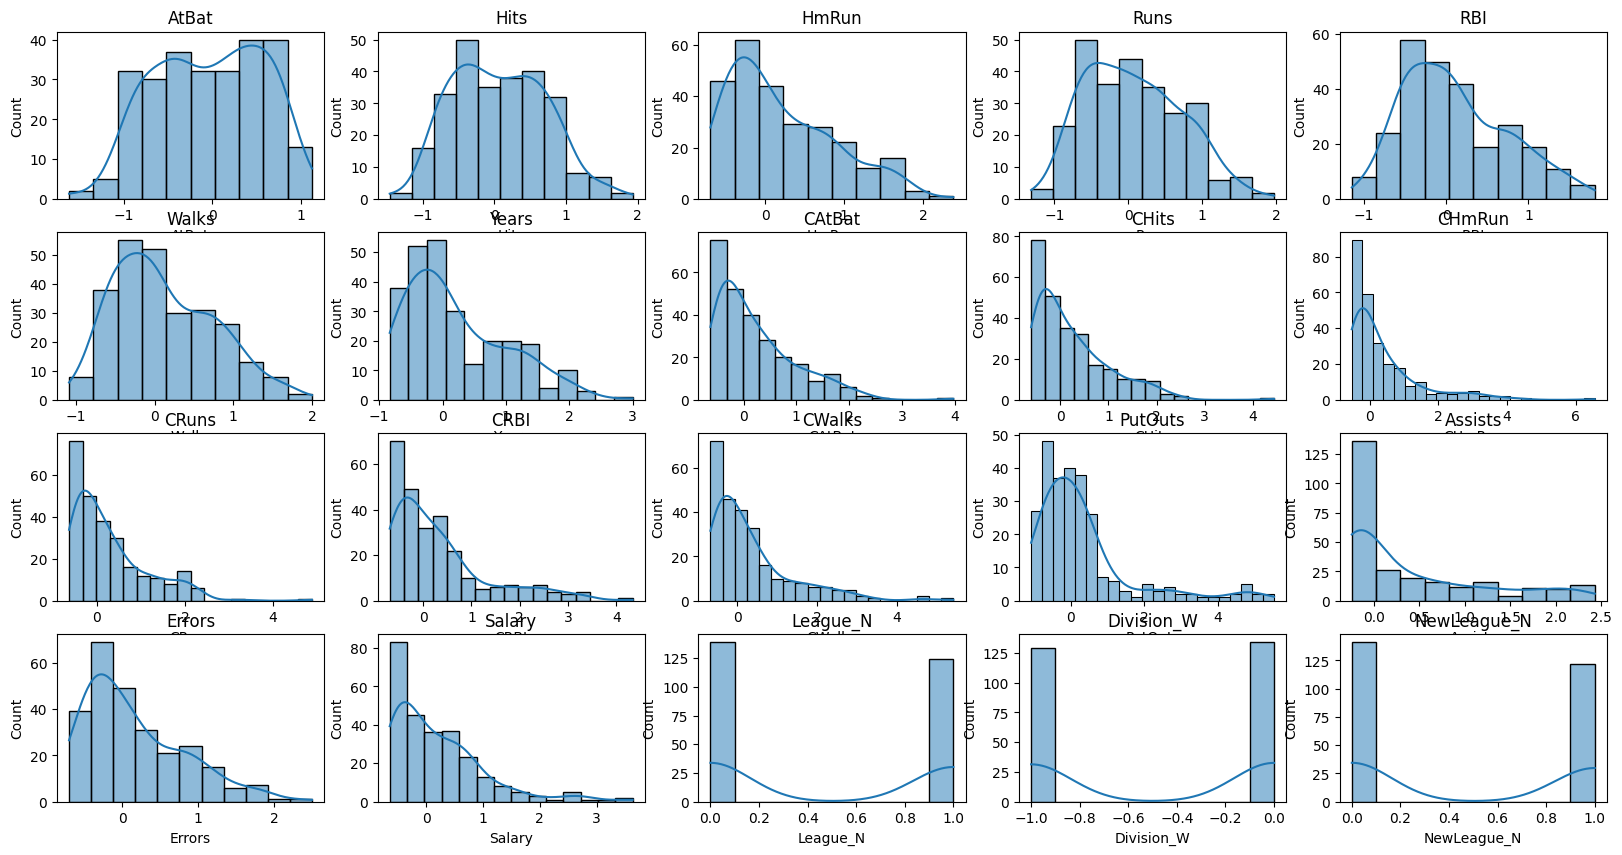

In [485]:
# I want to print the distribution of each column to look for outliers in one figure displots
plt.figure(figsize=(20, 10))
for i, column in enumerate(df_hitters_scaled.columns):
    plt.subplot(4, 5, i+1)
    sns.histplot(df_hitters_scaled[column], kde=True)
    plt.title(column)

In [486]:
# apply another scaler
# scaler = StandardScaler()

In [487]:
# df_hitters_scaled_standard = scaler.fit_transform(df_hitters)
# type(df_hitters_scaled_standard)

In [488]:
# df_hitters_scaled_standard = pd.DataFrame(df_hitters_scaled_standard, columns=df_hitters.columns)
# df_hitters_scaled_standard.head()

In [489]:
# # I want to print the distribution of each column to look for outliers in one figure displots
# plt.figure(figsize=(20, 10))
# for i, column in enumerate(df_hitters_scaled_standard.columns):
#     plt.subplot(4, 5, i+1)
#     sns.histplot(df_hitters_scaled_standard[column], kde=True)
#     plt.title(column)

`approxomately they have the same effect`

In [490]:
# Check the correlation between the dependent and independent variables
correlation = df_hitters_scaled.corr()
correlation['Salary'].sort_values(ascending=True)

# Any correlation above 0.45 is considered high 
# The highest correlation is with CRuns, CRBI, CHits, CAtBat, CHmRun
# The lowest correlation is with Division, League, League, Errors, NewLeague, Assists They approxiamtely have 0 correlation or by negative correlation so they are not important 

Division_W    -0.192514
League_N      -0.014282
Errors        -0.005401
NewLeague_N   -0.002834
Assists        0.025436
PutOuts        0.300480
HmRun          0.343028
AtBat          0.394771
Years          0.400657
Runs           0.419859
Hits           0.438675
Walks          0.443867
RBI            0.449457
CWalks         0.489822
CHmRun         0.524931
CAtBat         0.526135
CHits          0.548910
CRuns          0.562678
CRBI           0.566966
Salary         1.000000
Name: Salary, dtype: float64

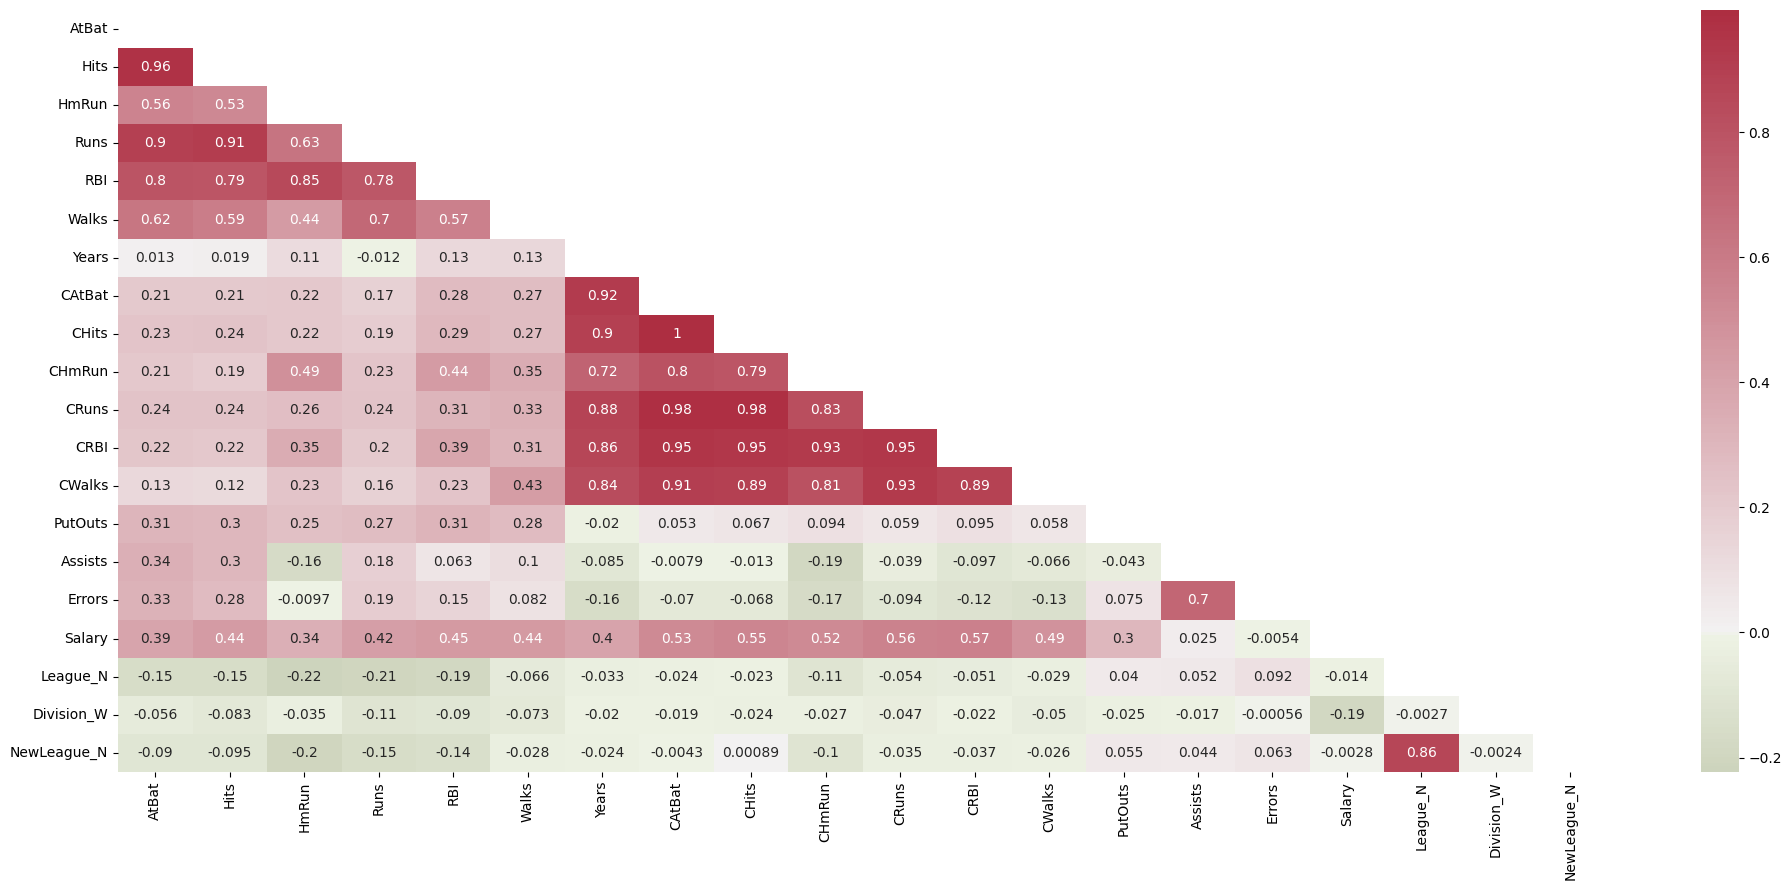

In [491]:
# Check for multicolinearity
plt.figure(figsize=(20,9))

corr =  df_hitters_scaled.corr()

# Create a mask
mask = np.triu(np.ones_like(corr, dtype=bool))

# Create a custom divergin palette
cmap = sns.diverging_palette(100, 7, s=75, l=40,
                            n=5, center="light", as_cmap=True)

# plt.figure(figsize=(10, 6))
sns.heatmap(corr, mask=mask, center=0, annot=True,
             cmap=cmap)

plt.tight_layout()
plt.show()

## Declare the dependent and independent variables


In [492]:
X = df_hitters_scaled.drop('Salary', axis = 1)
y = df_hitters_scaled['Salary']

X.isnull().sum(), y.isnull().sum()

(AtBat          0
 Hits           0
 HmRun          0
 Runs           0
 RBI            0
 Walks          0
 Years          0
 CAtBat         0
 CHits          0
 CHmRun         0
 CRuns          0
 CRBI           0
 CWalks         0
 PutOuts        0
 Assists        0
 Errors         0
 League_N       0
 Division_W     0
 NewLeague_N    0
 dtype: int64,
 np.int64(0))

## Split the data into training and testing parts

In [493]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=365)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((170, 19), (93, 19), (170,), (93,))

In [494]:
# scaler = StandardScaler()

# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

## Perform linear regression

In [495]:
# X_train.info()

In [496]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [497]:
print("Linear Regression coefficients are: ",lin_reg.coef_)
print("Linear Regression y-intercept is: ",lin_reg.intercept_)

Linear Regression coefficients are:  [-0.63153054  0.48396599  0.07611295 -0.09159408  0.01019339  0.31694665
 -0.08633461 -2.13600656  1.9500497   0.04515558  0.8619065   0.11263227
 -0.3255975   0.14691088  0.15625108 -0.03860153  0.21040648 -0.29306351
 -0.12541123]
Linear Regression y-intercept is:  -0.32756904910226087


In [498]:
lin_reg_y_pred = lin_reg.predict(X_test)
lin_reg_y_pred

array([-0.01703959,  0.01287108,  0.59604196,  0.66786316, -0.13356096,
       -0.23381077, -0.42991299,  0.07084648,  1.21973981,  0.23428544,
        0.11262363,  0.08625842,  0.74106284,  0.5832057 , -0.36529032,
       -0.18720372, -0.15152726,  0.51001808, -0.45377236,  0.40497537,
        0.71859431, -0.40766056,  0.26449744,  1.33529255,  1.53051491,
        2.08801217,  0.62870814,  1.19508867,  0.23528942,  1.21798372,
        0.09395347, -0.22700765, -0.11381827,  0.13962229, -0.41965314,
       -0.32767024, -0.31431834,  0.92458271,  0.34339812, -0.35667934,
       -0.1813912 ,  0.05523304,  0.79814024, -0.08172295,  0.3490908 ,
       -0.25573889,  0.25318709,  0.29453906,  0.4243556 ,  0.21431223,
        2.83469559,  0.55812749, -0.0803138 ,  0.03281709,  1.16412927,
        0.51062926,  0.23445465, -0.63708242, -0.38543615, -0.40969   ,
        0.45330437,  0.11217305,  0.21202034,  0.26580769,  1.09647808,
        0.01549551, -0.28328535,  0.43370072, -0.27950465, -0.02

In [499]:
lin_comp = pd.DataFrame({'Predicted': lin_reg_y_pred, 'Actual': y_test})
lin_comp

,Predicted,Actual
13,-0.017040,-0.330357
141,0.012871,0.558036
137,0.596042,1.562500
94,0.667863,0.558036
224,-0.133561,0.089286
...,...,...
246,-0.004461,0.000000
212,-0.073383,-0.312500
26,-0.552181,-0.562500
161,-0.195799,0.633929


In [500]:
print("Linear Regression Model RMSE is: ", math.sqrt(mean_squared_error(y_test, lin_reg_y_pred)))
print("Linear Regression Model Training Score: ",lin_reg.score(X_train, y_train))
print("Linear Regression Model Testing Score: ",lin_reg.score(X_test, y_test))

Linear Regression Model RMSE is:  0.5593563712489396
Linear Regression Model Training Score:  0.568058916051897
Linear Regression Model Testing Score:  0.3455994829736335


## Perform ridge regression 

In [501]:
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)

In [502]:
# Initializing the ridge regressor
ridge = RidgeCV(alphas=np.arange(0.1, 10, 0.1), cv=cv, scoring='neg_mean_absolute_error')

In [503]:
# Fitting the ridge regressor
ridge.fit(X_train,y_train)

RidgeCV(alphas=array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9,
       4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2,
       5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5,
       6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8,
       7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1,
       9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9]),
        cv=RepeatedKFold(n_repeats=3, n_splits=5, random_state=1),
        scoring='neg_mean_absolute_error')

In [504]:
ridge_reg_y_pred = ridge.predict(X_test)

In [505]:
print("Ridge tuning parameter:", (ridge.alpha_))
print ("\nRidge model coefficients:\n\n", (ridge.coef_))
print ("\nRidge model intercept:\n", (ridge.intercept_))

Ridge tuning parameter: 9.9

Ridge model coefficients:

 [-0.13572768  0.13623773 -0.01090038  0.06593716  0.03770614  0.14669747
 -0.09500692  0.01598781  0.21314268  0.02740769  0.24238928  0.19132632
 -0.14888433  0.15637948  0.06265602 -0.02447558  0.08440797 -0.25082588
 -0.03151026]

Ridge model intercept:
 -0.1761955334198111


In [506]:
print("Ridge Regression Model RMSE is: ", math.sqrt(mean_squared_error(y_test, ridge_reg_y_pred)))
print("Ridge Regression Model Training Score: ",ridge.score(X_train, y_train))
print("Ridge Regression Model Testing Score: ",ridge.score(X_test, y_test))

Ridge Regression Model RMSE is:  0.5202458983008118
Ridge Regression Model Training Score:  0.5165571818706399
Ridge Regression Model Testing Score:  0.4339122133263562


## Perform lasso regression

In [507]:
# Initializing the lasso regressor
lasso = LassoCV(alphas=np.arange(0.1, 15.0, 0.1), cv=cv, tol = 1)

In [508]:
# Fitting the lasso regressor
lasso.fit(X_train,y_train)

LassoCV(alphas=array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
        1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,
        2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,
        3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,
        4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,
        5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,
        6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,  7.7,
        7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,...
        8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,  9.9,
       10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9, 11. ,
       11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12. , 12.1,
       12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. , 13.1, 13.2,
       13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1, 14.2, 14.3,
       14.4, 14.5, 14.6, 14.7, 14.8, 14.9]),
        cv=RepeatedKFold(n_repeats=3, n_splits=5, random_state=1), tol=1)

In [509]:
lasso_reg_y_pred = lasso.predict(X_test)

In [510]:
print("\nLasso tuning parameter:\n", (lasso.alpha_))
print ("\nLasso model coefficients:\n\n", (lasso.coef_))
print ("\nLassso model intercept:\n", (lasso.intercept_))


Lasso tuning parameter:
 0.1

Lasso model coefficients:

 [ 0.          0.02662857  0.          0.00108478  0.          0.02861403
  0.          0.22651282  0.1010204   0.07821988  0.00752726  0.01936143
  0.          0.15798374  0.          0.          0.         -0.
  0.        ]

Lassso model intercept:
 0.021030263720495296


In [511]:
print("Lasso Regression Model RMSE is: ", math.sqrt(mean_squared_error(y_test, lasso_reg_y_pred)))
print("Lasso Regression Model Training Score: ",lasso.score(X_train, y_train))
print("Lasso Regression Model Testing Score: ",lasso.score(X_test, y_test))

Lasso Regression Model RMSE is:  0.573611576467186
Lasso Regression Model Training Score:  0.4109276755078852
Lasso Regression Model Testing Score:  0.31181964572537213


## Compare the score

In [512]:
print("Linear Regression Model Training Score: ",lin_reg.score(X_train, y_train))
print("Linear Regression Model Testing Score: ",lin_reg.score(X_test, y_test))
print("Ridge Regression Model Training Score: ",ridge.score(X_train, y_train))
print("Ridge Regression Model Testing Score: ",ridge.score(X_test, y_test))
print("Lasso Regression Model Training Score: ",lasso.score(X_train, y_train))
print("Lasso Regression Model Testing Score: ",lasso.score(X_test, y_test))

Linear Regression Model Training Score:  0.568058916051897
Linear Regression Model Testing Score:  0.3455994829736335
Ridge Regression Model Training Score:  0.5165571818706399
Ridge Regression Model Testing Score:  0.4339122133263562
Lasso Regression Model Training Score:  0.4109276755078852
Lasso Regression Model Testing Score:  0.31181964572537213


## Root mean squared error

In [513]:
print("Linear Regression Model RMSE is: ", math.sqrt(mean_squared_error(y_test, lin_reg_y_pred)))
print("Ridge Regression Model RMSE is: ", math.sqrt(mean_squared_error(y_test, ridge_reg_y_pred)))
print("Lasso Regression Model RMSE is: ", math.sqrt(mean_squared_error(y_test, lasso_reg_y_pred)))

Linear Regression Model RMSE is:  0.5593563712489396
Ridge Regression Model RMSE is:  0.5202458983008118
Lasso Regression Model RMSE is:  0.573611576467186


## $ Summary $  :
- by taking the nan in the data and fill it by different way the accuracy is about 27%  by the linear model
- but when tried to drop it the accuracy increased to 43% by the Ridge model

## Replacing the missing values in the DataFrame
Now we can use the model to predict the missing values to predict them 

In [514]:
# df = data.copy()

In [515]:
# # encode categorical variables
# df = pd.get_dummies(df, drop_first=True)
# df.head()

# use the one hot encoded data

df_hitters_nulls_encoded = OneHotEncoder_.transform(df_hitters_nulls[['League', 'Division', 'NewLeague']])
df_hitters_nulls_encoded = pd.DataFrame(df_hitters_nulls_encoded.toarray(), columns=['League_N', 'Division_W', 'NewLeague_N'])
df_hitters_nulls_encoded.shape, df_hitters_nulls.shape


((59, 3), (59, 20))

In [516]:
df_hitters_nulls = df_hitters_nulls.reset_index(drop=True)
df_hitters_nulls_encoded = df_hitters_nulls_encoded.reset_index(drop=True)


In [517]:

df_hitters_nulls = pd.concat([df_hitters_nulls, df_hitters_nulls_encoded], axis=1)
df_hitters_nulls.drop(['League', 'Division', 'NewLeague'], axis=1, inplace=True)
df_hitters_nulls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   AtBat        59 non-null     int64  
 1   Hits         59 non-null     int64  
 2   HmRun        59 non-null     int64  
 3   Runs         59 non-null     int64  
 4   RBI          59 non-null     int64  
 5   Walks        59 non-null     int64  
 6   Years        59 non-null     int64  
 7   CAtBat       59 non-null     int64  
 8   CHits        59 non-null     int64  
 9   CHmRun       59 non-null     int64  
 10  CRuns        59 non-null     int64  
 11  CRBI         59 non-null     int64  
 12  CWalks       59 non-null     int64  
 13  PutOuts      59 non-null     int64  
 14  Assists      59 non-null     int64  
 15  Errors       59 non-null     int64  
 16  Salary       0 non-null      float64
 17  League_N     59 non-null     float64
 18  Division_W   59 non-null     float64
 19  NewLeague_

In [518]:
df_hitters_nulls.isnull().sum()

AtBat           0
Hits            0
HmRun           0
Runs            0
RBI             0
Walks           0
Years           0
CAtBat          0
CHits           0
CHmRun          0
CRuns           0
CRBI            0
CWalks          0
PutOuts         0
Assists         0
Errors          0
Salary         59
League_N        0
Division_W      0
NewLeague_N     0
dtype: int64

In [524]:
df_hitters_nulls= scaler.transform(df_hitters_nulls)
df_hitters_nulls = pd.DataFrame(df_hitters_nulls, columns=df_hitters.columns)

/home/israa/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RobustScaler was fitted with feature names
  warnings.warn(


In [525]:
X_nan = df_hitters_nulls.drop('Salary', axis = 1)
y_nan = df_hitters_nulls['Salary']

In [527]:
# X_nan = scaler.transform(X_nan)

In [528]:
# scaler = StandardScaler()
# X_nan = scaler.fit_transform(X_nan)

In [530]:
nan_pred = lin_reg.predict(X_nan)
nan_pred

array([-0.03211391, -0.32450836, -0.32377117, -0.33721311, -0.34116848,
       -0.2207722 , -0.03696489, -0.04596705, -0.23689711, -0.26970588,
       -0.24801605, -0.04092361, -0.03622246, -0.03884146, -0.05058787,
       -0.32931984,  0.05101742, -0.0373401 ,  0.06198607,  0.04936198,
       -0.32642392, -0.32654175, -0.24562552, -0.26003804, -0.01680524,
       -0.03122766, -0.02595479, -0.0399752 , -0.22401182,  0.03514182,
       -0.32604472, -0.15795872, -0.33309596, -0.33665804,  0.05628472,
       -0.33836161, -0.34185428,  0.05646507, -0.02298516, -0.31979193,
        0.05514017, -0.32247687,  0.05648073,  0.05906301, -0.3304563 ,
       -0.225937  , -0.25372833, -0.29274574, -0.02162745, -0.32423662,
       -0.23326911, -0.32652994, -0.23174528, -0.03705723, -0.34182293,
       -0.03757991, -0.27201856,  0.07174129,  0.0444291 ])

In [535]:
# df_hitters_nan.drop(['Salary'], axis=1)
# df_hitters_nulls = df.copy()
df_hitters_nulls['Salary'] = nan_pred
df_hitters_nulls

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,League_N,Division_W,NewLeague_N
0,-1.698122,-1.478980,-0.739645,-1.330556,-1.157049,-1.108131,-1.138889,-0.633706,-0.613461,-0.522622,-0.639187,-0.699879,-0.678141,-1.066688,-0.244920,-0.57,-0.032114,0.0,-2.0,0.0
1,-1.699978,-1.484490,-0.727811,-1.336965,-1.165378,-1.110727,-1.083333,-0.633716,-0.613495,-0.522289,-0.639252,-0.699998,-0.678186,-1.074197,-0.245894,-0.77,-0.324508,0.0,-1.0,0.0
2,-1.696200,-1.471224,-0.710059,-1.313251,-1.148721,-1.064014,-0.833333,-0.633175,-0.611470,-0.506139,-0.635198,-0.694085,-0.668504,-1.056020,-0.243295,-0.68,-0.323771,0.0,-1.0,0.0
3,-1.702693,-1.490408,-0.739645,-1.347220,-1.173111,-1.119377,-1.000000,-0.633729,-0.613518,-0.522456,-0.639323,-0.700063,-0.678307,-1.058309,-0.243413,-0.66,-0.337213,0.0,-1.0,0.0
4,-1.697785,-1.475306,-0.692308,-1.322865,-1.156454,-1.086505,-0.694444,-0.632996,-0.610969,-0.485494,-0.632660,-0.692188,-0.661959,-1.073991,-0.239367,-0.70,-0.341168,0.0,-1.0,0.0
5,-1.694345,-1.463673,-0.585799,-1.304919,-1.122546,-1.075260,-0.916667,-0.633354,-0.612152,-0.486993,-0.635835,-0.694140,-0.673270,-1.045352,-0.242882,-0.69,-0.220772,1.0,-1.0,1.0
6,-1.700349,-1.485102,-0.745562,-1.337606,-1.168352,-1.105536,-1.055556,-0.633625,-0.613210,-0.522289,-0.638367,-0.699354,-0.676739,-1.075296,-0.241493,-0.65,-0.036965,0.0,-2.0,0.0
7,-1.697229,-1.472449,-0.715976,-1.329915,-1.142772,-1.094291,-0.722222,-0.633102,-0.611276,-0.483663,-0.634280,-0.691847,-0.669907,-1.076898,-0.245894,-0.77,-0.045967,0.0,-2.0,0.0
8,-1.698999,-1.480000,-0.739645,-1.327992,-1.167162,-1.108131,-1.138889,-0.633712,-0.613468,-0.522622,-0.639161,-0.700035,-0.678141,-1.073098,-0.240814,-0.67,-0.236897,1.0,-1.0,1.0
9,-1.699421,-1.481429,-0.745562,-1.336324,-1.163593,-1.107266,-0.666667,-0.632950,-0.610838,-0.515130,-0.634202,-0.694371,-0.671068,-1.074540,-0.243413,-0.72,-0.269706,1.0,-1.0,1.0


In [536]:
df_hitters_nulls.describe().T

,count,mean,std,min,25%,50%,75%,max
AtBat,59.0,-1.698347,0.002352,-1.702794,-1.699733,-1.698865,-1.697119,-1.693282
Hits,59.0,-1.478021,0.008162,-1.492041,-1.483163,-1.480000,-1.473265,-1.452857
HmRun,59.0,-0.704242,0.044082,-0.745562,-0.736686,-0.715976,-0.692308,-0.538462
Runs,59.0,-1.328112,0.013409,-1.349143,-1.336965,-1.330556,-1.321263,-1.291460
RBI,59.0,-1.154902,0.012859,-1.174301,-1.163296,-1.157049,-1.149018,-1.118382
Walks,59.0,-1.095874,0.015515,-1.120242,-1.106401,-1.098616,-1.087803,-1.044983
Years,59.0,-0.943503,0.152317,-1.138889,-1.055556,-0.972222,-0.833333,-0.527778
CAtBat,59.0,-0.633457,0.000270,-0.633735,-0.633662,-0.633587,-0.633272,-0.632686
CHits,59.0,-0.612571,0.000969,-0.613549,-0.613313,-0.613045,-0.612059,-0.609701
CHmRun,59.0,-0.511033,0.017194,-0.522789,-0.521207,-0.518127,-0.511717,-0.449199


In [537]:
df_hitters_nulls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   AtBat        59 non-null     float64
 1   Hits         59 non-null     float64
 2   HmRun        59 non-null     float64
 3   Runs         59 non-null     float64
 4   RBI          59 non-null     float64
 5   Walks        59 non-null     float64
 6   Years        59 non-null     float64
 7   CAtBat       59 non-null     float64
 8   CHits        59 non-null     float64
 9   CHmRun       59 non-null     float64
 10  CRuns        59 non-null     float64
 11  CRBI         59 non-null     float64
 12  CWalks       59 non-null     float64
 13  PutOuts      59 non-null     float64
 14  Assists      59 non-null     float64
 15  Errors       59 non-null     float64
 16  Salary       59 non-null     float64
 17  League_N     59 non-null     float64
 18  Division_W   59 non-null     float64
 19  NewLeague_

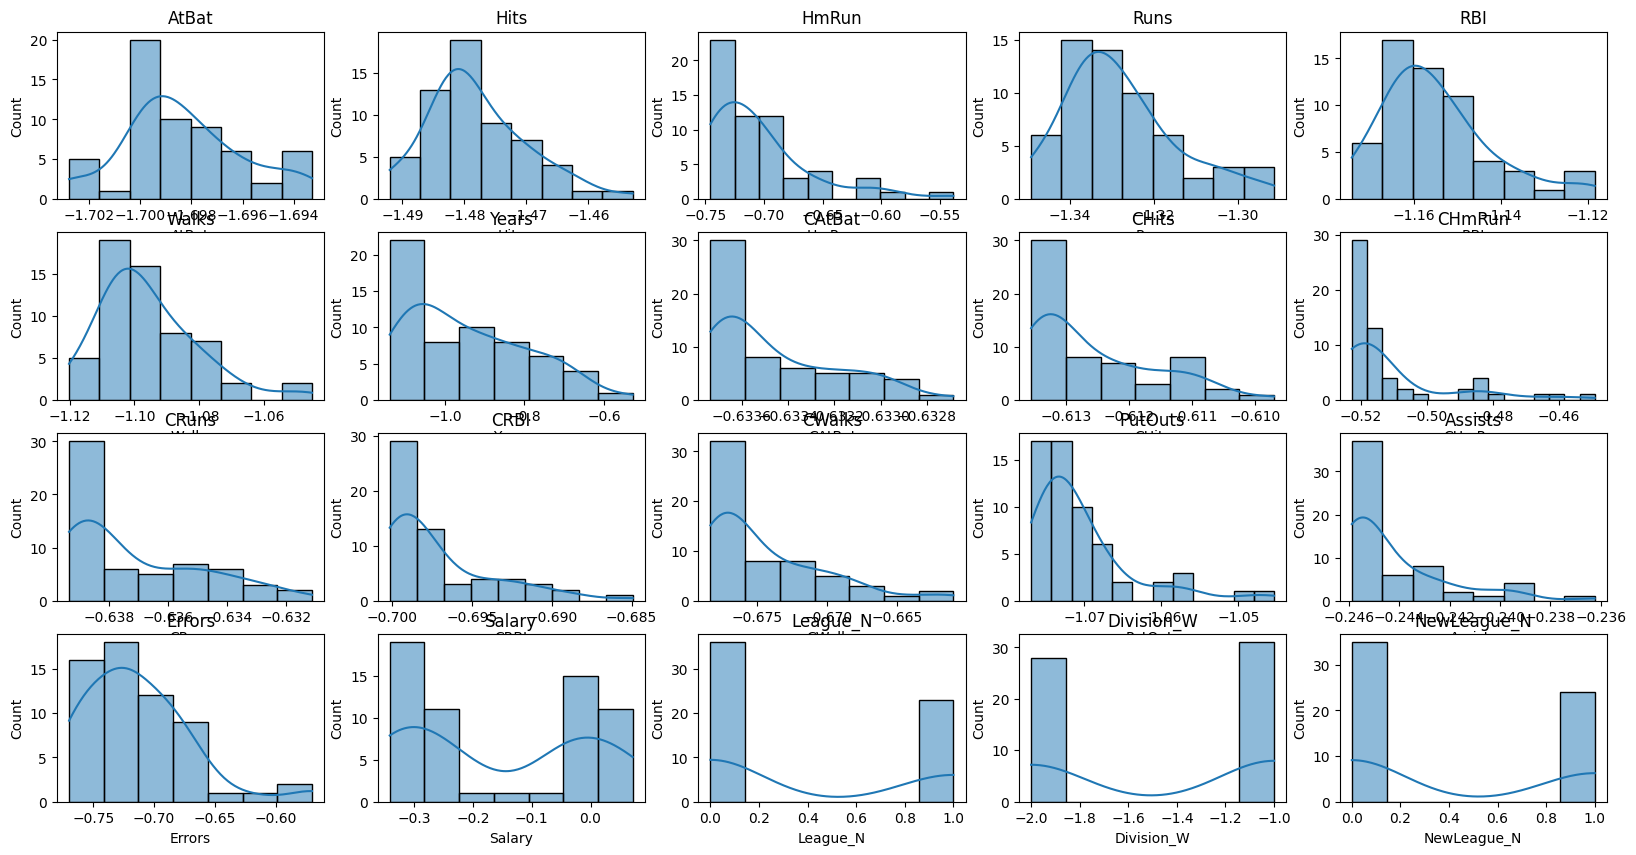

In [538]:
# I want to print the distribution of each column to look for outliers in one figure displots
plt.figure(figsize=(20, 10))
for i, column in enumerate(df_hitters_nulls.columns):
    plt.subplot(4, 5, i+1)
    sns.histplot(df_hitters_nulls[column], kde=True)
    plt.title(column)
